[(For other results on CWRU dataset visit this page)](https://biswajitsahoo1111.github.io/cbm_codes_open/)

Case Western Reserve University bearing data sets are collected at two sampling frequencies, 48k and 12k. In the previous posts we have used the 48k data. In this post we will use 12k data. The 12k sampling frequency data are of shorter length than 48k data. So we will decrease the segment length from 2048 data points to 1024 data points.

The original data have been collected with 0,1,2, and 3 hp load for each fault type. In this study we have only taken data with 1 hp load.

**Important Note:** In the CWRU website, sampling frequency of the normal data is not mentioned. Most research paper take it as 48k. Some authors also consider it as being taken at a sampling frequency of 12k. Some other authors just use it without ever mentioning its sampling frequency. But in our application we only need segment of normal data of length 1024. So we will use the normal data segments available at the website without going into the discussion of sampling frequency. Still, to be on the safer side, we will show results including the normal data as a class as well as excluding it.

The 12 classes (including normal data) that we consider are:
There are 10 class for this external load (1 hp). The classes are:

* C1  : Ball defect (0.007 inch)
* C2  : Ball defect (0.014 inch)
* C3  : Ball defect (0.021 inch)
* C4  : Ball defect (0.028 inch)
* C5  : Inner race fault (0.007 inch)
* C6  : Inner race fault (0.014 inch)
* C7  : Inner race fault (0.021 inch)
* C8  : Inner race fault (0.028 inch)
* C9  : Normal
* C10 : Outer race fault (0.007 inch, data collected from 6 O'clock position)
* C11 : Outer race fault (0.014 inch, 6 O'clock)
* C12 : Outer race fault (0.021 inch, 6 O'clock)

When we exclude normal data, we won't consider "C9" class and study the rest 11 fault classes. We will consider both time domain and wavelet domain features. We will not go into the details here. Refer the link given at the top of the page to get more details. 

Download the data from the links below:

* [Time domain features 12k](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_time_12k_1024_load_1.csv)
* [Wavelet packet energy features 12k](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_wav_energy8_12k_1024_load_1.csv)
* [Wavelet packet entropy (Shannon) features 12k](https://github.com/biswajitsahoo1111/cbm_codes_open/blob/master/notebooks/data/feature_wav_ent8_shan_12k_1024_load_1.csv)

As 12k data are shorter, for each fault type we collect 115 data segments of 1024 length each. So there are a total of $115 \times 12=1380$ data points. Of this we take $35 \times 12 = 420$ data points as test set and rest as training set.

SVM is applied to training set data and best parameters are chosen by cross validation. The best parameters are then applied to test set data to predict final classification result. We have not printed the intermediate results. Readers can easily print those as per requirement.

First we will consider all 12 classes and apply SVM to separately to time domain and wavelet domain features.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_time = pd.read_csv("./data/feature_time_12k_1024_load_1.csv")
data_wav_energy = pd.read_csv("./data/feature_wav_energy8_12k_1024_load_1.csv")
data_wav_entropy = pd.read_csv("./data/feature_wav_ent8_shan_12k_1024_load_1.csv")

In [3]:
train_time, test_time = train_test_split(data_time, test_size = 420, stratify = data_time['fault'], random_state = 323)
train_wav_energy, test_wav_energy = train_test_split(data_wav_energy, test_size = 420, stratify = data_wav_energy['fault'],
                                                    random_state = 3234)
train_wav_entropy, test_wav_entropy = train_test_split(data_wav_entropy, test_size = 420, stratify = data_wav_entropy['fault'],
                                                      random_state = 234)

Before applying SVM, it is always a better idea to scale the data.

In [4]:
scaler_time = StandardScaler()
train_data_scaled_time = scaler_time.fit_transform(train_time.iloc[:,:-1])
test_data_scaled_time = (test_time.iloc[:,:-1].values - scaler_time.mean_)/np.sqrt(scaler_time.var_)

scaler_wav_energy = StandardScaler()
train_data_scaled_wav_energy = scaler_wav_energy.fit_transform(train_wav_energy.iloc[:,:-1])
test_data_scaled_wav_energy = (test_wav_energy.iloc[:,:-1].values - scaler_wav_energy.mean_)/np.sqrt(scaler_wav_energy.var_)

scaler_wav_entropy = StandardScaler()
train_data_scaled_wav_entropy = scaler_wav_entropy.fit_transform(train_wav_entropy.iloc[:,:-1])
test_data_scaled_wav_entropy = (test_wav_entropy.iloc[:,:-1].values - scaler_wav_entropy.mean_)/np.sqrt(scaler_wav_entropy.var_)

We will check a grid of parameters to find the best one. For each parameter combination, 10 fold cross-validation is performed.

In [5]:
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}

In [6]:
tuned_svm_clf_time = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf_wav_energy = GridSearchCV(SVC(), parameters, n_jobs = -1, cv = 10)
tuned_svm_clf_wav_entropy = GridSearchCV(SVC(), parameters, n_jobs = -1, cv = 10)

In [7]:
tuned_svm_clf_time.fit(train_data_scaled_time, train_time['fault'])

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
tuned_svm_clf_wav_energy.fit(train_data_scaled_wav_energy, train_wav_energy['fault'])

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [9]:
tuned_svm_clf_wav_entropy.fit(train_data_scaled_wav_entropy, train_wav_entropy['fault'])

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
best_clf_time = tuned_svm_clf_time.best_estimator_
best_clf_wav_energy = tuned_svm_clf_wav_energy.best_estimator_
best_clf_wav_entropy = tuned_svm_clf_wav_entropy.best_estimator_

In [11]:
train_predictions_time = best_clf_time.predict(train_data_scaled_time)
train_predictions_wav_energy = best_clf_wav_energy.predict(train_data_scaled_wav_energy)
train_predictions_wav_entropy = best_clf_wav_entropy.predict(train_data_scaled_wav_entropy)

test_predictions_time = best_clf_time.predict(test_data_scaled_time)
test_predictions_wav_energy = best_clf_wav_energy.predict(test_data_scaled_wav_energy)
test_predictions_wav_entropy = best_clf_wav_entropy.predict(test_data_scaled_wav_entropy)

In [12]:
train_confu_time = confusion_matrix(train_time['fault'], train_predictions_time)
train_confu_wav_energy = confusion_matrix(train_wav_energy['fault'], train_predictions_wav_energy)
train_confu_wav_entropy = confusion_matrix(train_wav_entropy['fault'], train_predictions_wav_entropy)

test_confu_time = confusion_matrix(test_time['fault'], test_predictions_time)
test_confu_wav_energy = confusion_matrix(test_wav_energy['fault'], test_predictions_wav_energy)
test_confu_wav_entropy = confusion_matrix(test_wav_entropy['fault'], test_predictions_wav_entropy)

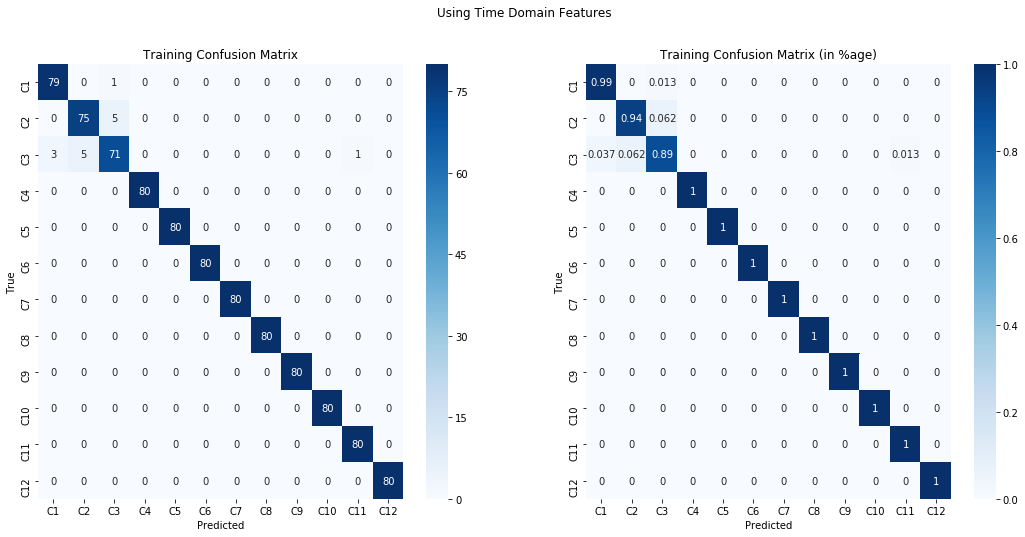

In [13]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7',
              'C8','C9','C10','C11','C12']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_time, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_time/80, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Time Domain Features')
plt.show()

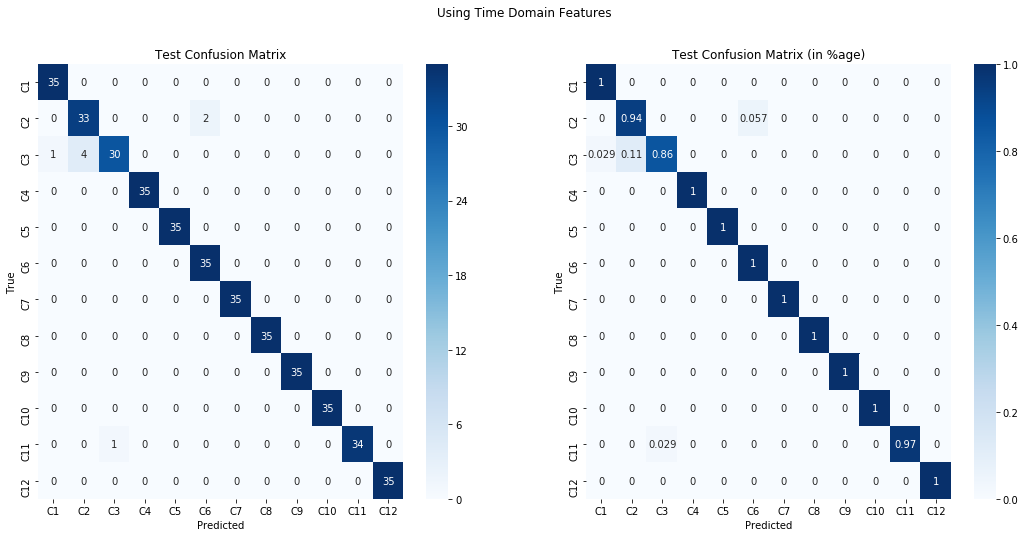

In [14]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_time, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_time/35, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Time Domain Features')
plt.show()

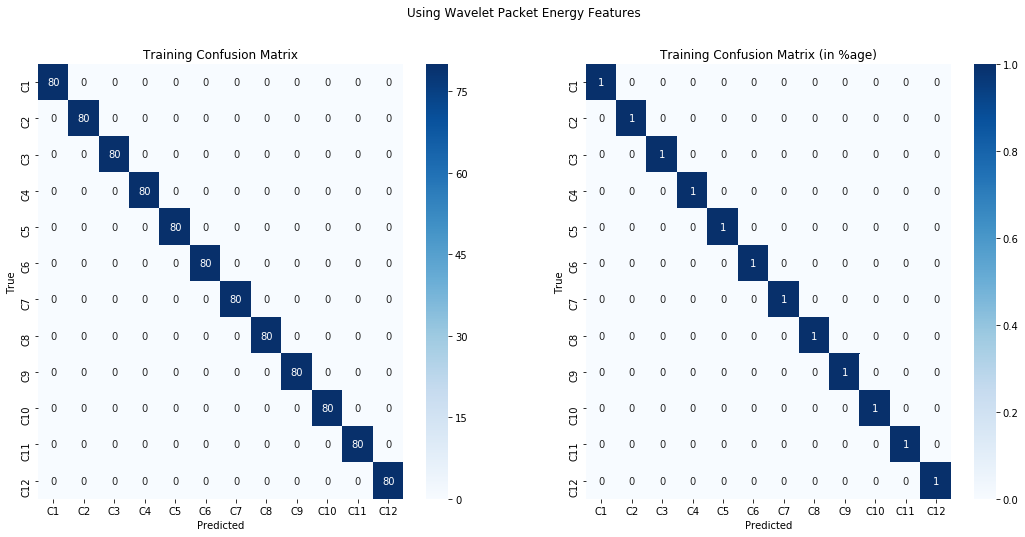

In [15]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7',
              'C8','C9','C10','C11','C12']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_wav_energy, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_wav_energy/80, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Wavelet Packet Energy Features')
plt.show()

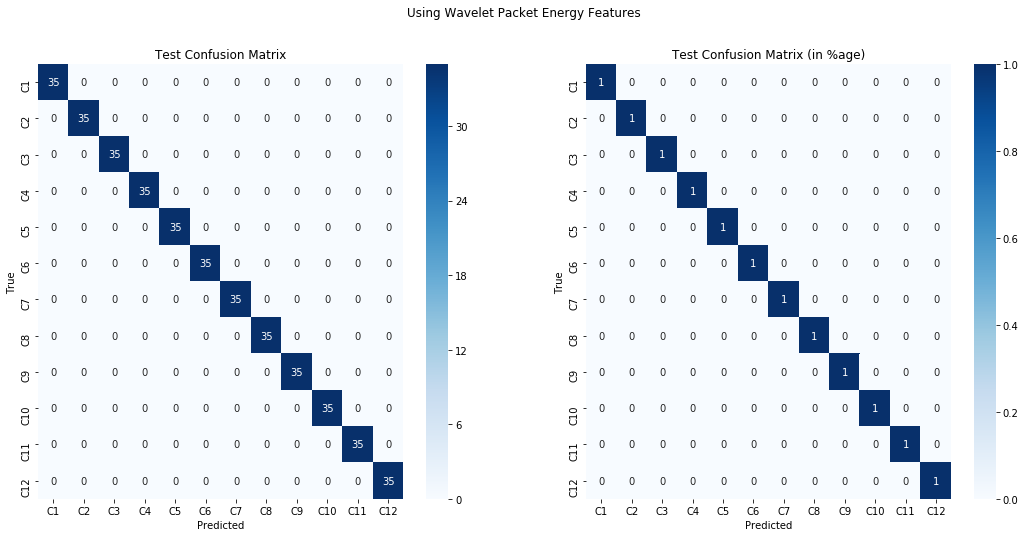

In [16]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_wav_energy, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_wav_energy/35, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Wavelet Packet Energy Features')
plt.show()

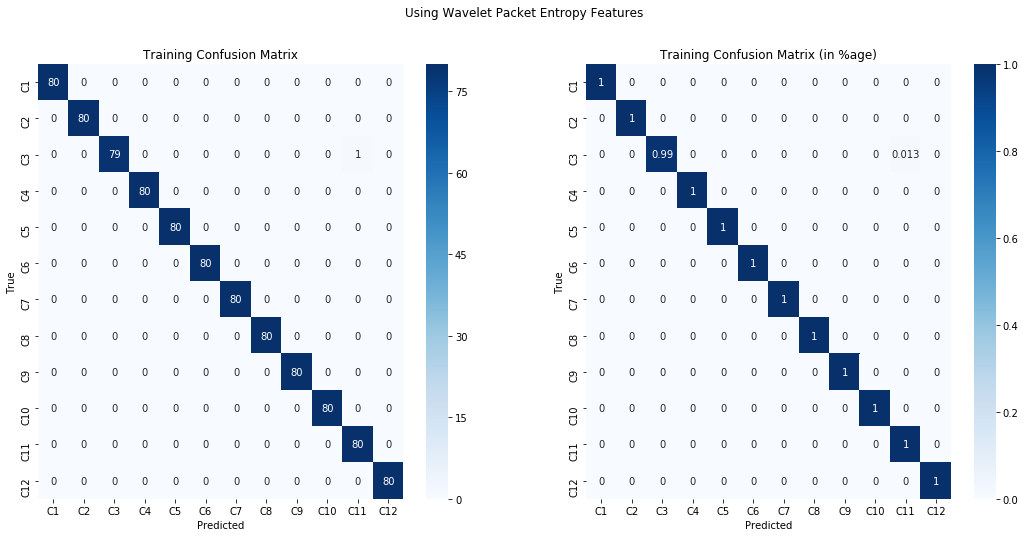

In [17]:
fault_type = ['C1','C2','C3','C4','C5','C6','C7',
              'C8','C9','C10','C11','C12']
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_wav_entropy, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(train_confu_wav_entropy/80, annot= True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Training Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Wavelet Packet Entropy Features')
plt.show()

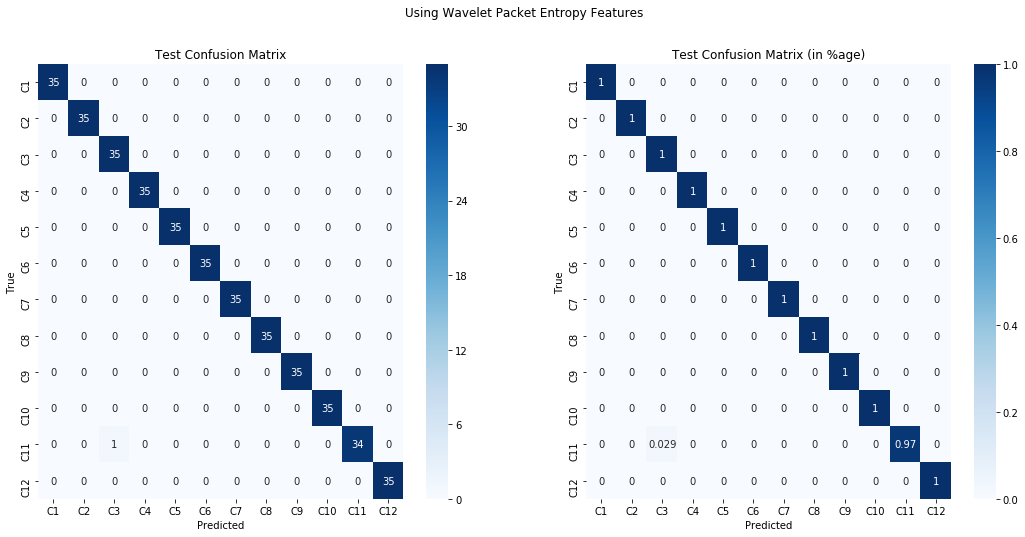

In [18]:
plt.figure(2,figsize=(18,8))
plt.subplot(121)
sns.heatmap(test_confu_wav_entropy, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_wav_entropy/35, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues")
plt.title('Test Confusion Matrix (in %age)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.suptitle('Using Wavelet Packet Entropy Features')
plt.show()

In [19]:
overall_test_accuracy_time = accuracy_score(test_time['fault'], test_predictions_time)
print("Overall test accuracy on time domain features: ", overall_test_accuracy_time)

Overall test accuracy on time domain features:  0.9809523809523809


In [20]:
overall_test_accuracy_wav_energy = accuracy_score(test_wav_energy['fault'], test_predictions_wav_energy)
print("Overall test accuracy on wavelet energy features: ", overall_test_accuracy_wav_energy)

Overall test accuracy on wavelet energy features:  1.0


In [21]:
overall_test_accuracy_wav_entropy = accuracy_score(test_wav_entropy['fault'], test_predictions_wav_entropy)
print("Overall test accuracy on wavelet entropy features: ", overall_test_accuracy_wav_entropy)

Overall test accuracy on wavelet entropy features:  0.9976190476190476


Note that with wavelet packet features accuracy is near perfect. This is also in agreement with our previous results on 48k data.